# Simulating Tidal Streams from GCs Bound Initially to Final Set of MW Satellites

NOTE: 14/40 satellite galaxies give reasonable orbits for the GC (i.e. it ends up becoming bound to MW and is somewhere in the stellar halo (~50kpc from galactic center).
Of those 14 satellites: ~10 give the expected cocoon (no structure, a disperse distribution of stars around the orbit) and 4 give a more structured cocoon that doesn't seem to disperse about the thin stream).

Non-structured cocoons: BootesI, ComaBerenices, Fornax, ReticulumII, Sgr, Sculptor, Segue1, TucanaIII, UrsaMajorII, UrsaMinor

Structured cocoons: Carina, Draco, Segue2, Willman1

In [1]:
#%matplotlib widget
import matplotlib.pyplot as plt
import numpy 
from final_modelstreams import plot_tidalstreams, zoom, plot_colormap, test_cocoon, test_stream
from clusterorbits import plot_sat_cluster
from galpy.orbit import Orbit
from galpy.potential import HernquistPotential
from astropy import units

# Import orbits for Milky Way's satellite galaxies
satellite_gal = Orbit.from_name('MWsatellitegalaxies') #list of satellite galaxies of Milky Way 
name_satellite_gal = satellite_gal.name


gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [2]:
xaxis = 't'
yaxis = 'r'
Msat = 10.**11.*units.Msun
size = 1.05*(Msat/(10.**8./1*units.Msun))**0.5*units.kpc
potential = HernquistPotential(amp = 2*Msat, a = size, ro = 8., vo=220.)
x,y,z = 4*units.kpc, 0*units.kpc, 0*units.kpc
vcirc = potential.vcirc(4*units.kpc)
vx, vy, vz = 0.*units.km/units.s, vcirc, 0.*units.km/units.s
#tform, tsteady = 7.*units.Gyr, 0.5*units.Gyr #timescale for tidal disruption of satellite galaxy
Mcluster = 2e4*units.Msun
index_list = [1,5,8,10,13,26,27,28,29,30,35,37,38,39]
tsteady = 0.5*units.Gyr



In [3]:
# Finalized values for satellite galaxy dictionaries

# Define dictionaries
tform_dict = {'BootesI': 6.*units.Gyr, 'Carina': 5.*units.Gyr,'ComaBerenices': 6.*units.Gyr,  'Draco': 0.*units.Gyr,\
              'Fornax': 8.*units.Gyr, 'ReticulumII': 2.*units.Gyr, 'Sgr': 4.*units.Gyr, 'Sculptor': 5.*units.Gyr,\
              'Segue1': 2.*units.Gyr, 'Segue2': 1.5*units.Gyr, 'TucanaIII': -3.*units.Gyr, 'UrsaMajorII': 6.5*units.Gyr,\
              'UrsaMinor': 3.*units.Gyr,  'Willman1': 2.*units.Gyr}

unbound_dict = {'BootesI': 3.5*units.Gyr, 'Carina': 5.5*units.Gyr, 'ComaBerenices': 5.*units.Gyr,'Draco': 1.*units.Gyr,\
                'Fornax': 8.*units.Gyr,'ReticulumII': 1.5*units.Gyr,'Sgr': 1.*units.Gyr,'Sculptor': 5.*units.Gyr,\
                'Segue1': 2.*units.Gyr, 'Segue2': 1.5*units.Gyr,'TucanaIII': -5.5*units.Gyr, 'UrsaMajorII': 7.*units.Gyr,\
                'UrsaMinor': 3.*units.Gyr,  'Willman1': 0.5*units.Gyr}

xlim_dict = {'BootesI': '0,35', 'Carina': '20,47','ComaBerenices': '25,42.5','Draco': '30,80', 'Fornax': '18,29',\
             'ReticulumII': '10,22','Sgr': '20,70','Sculptor': '4,24', 'Segue1': '2,25', 'Segue2': '0,60',\
             'TucanaIII': '25,50', 'UrsaMajorII': '0,40', 'UrsaMinor': '3,7.5', 'Willman1': '10,30'}

ylim_dict = {'BootesI': '-50,20', 'Carina': '-60,25','ComaBerenices': '-4,4','Draco': '-30,40', 'Fornax': '8,17',\
             'ReticulumII': '0.5,4.5','Sgr': '-80,30','Sculptor': '-35,-5', 'Segue1': '-13,10',  'Segue2': '-50,70',\
             'TucanaIII': '-16,-10', 'UrsaMajorII': '-50,0', 'UrsaMinor': '-22,1', 'Willman1': '-50,50'}

post_tform_dict = {'BootesI': 4.9*units.Gyr, 'Carina': 5.*units.Gyr,'ComaBerenices': 5.*units.Gyr,'Draco': 4.3*units.Gyr,\
                   'Fornax': 5.*units.Gyr, 'ReticulumII': 5.*units.Gyr,'Sgr': 4.*units.Gyr,'Sculptor': 4.*units.Gyr, \
                   'Segue1': 4.3*units.Gyr,  'Segue2': 5.25*units.Gyr, 'TucanaIII': 4.8*units.Gyr,\
                   'UrsaMajorII': 4.5*units.Gyr, 'UrsaMinor': 5.*units.Gyr, 'Willman1': 5.*units.Gyr}

pre_tform_dict = {'BootesI': 6.*units.Gyr, 'Carina': 5.*units.Gyr,'ComaBerenices': 5.*units.Gyr,'Draco': 5.*units.Gyr,\
                  'Fornax': 5.*units.Gyr, 'ReticulumII': 5.*units.Gyr, 'Sgr': 7.*units.Gyr, 'Sculptor': 5.*units.Gyr,\
                  'Segue1': 5.*units.Gyr, 'Segue2': 5.*units.Gyr, 'TucanaIII': 7.*units.Gyr,\
                  'UrsaMajorII': 5.*units.Gyr, 'UrsaMinor': 5.*units.Gyr, 'Willman1': 5.*units.Gyr}



In [4]:
'''
# Code that takes input for tform of each satellite galaxy being considered
for index in index_list:
    sat_name = name_satellite_gal[index]
    value = input('Insert value (in units of Gyr) for tform of satellite galaxy: '+sat_name)
    tform_dict[sat_name] = float(value)*units.Gyr
    
# Make list of times at which star cluster becomes unbound in each satellite galaxy
unbound_dict = {}
for index in index_list:
    sat_name = name_satellite_gal[index]
    value = input('Insert value (in units of Gyr) for unbound time of satellite galaxy: '+sat_name)
    unbound_dict[sat_name] = float(value)*units.Gyr
    
# x and y limits for each tidal streams plot
xlim_dict = {}
ylim_dict = {}
for index in index_list:
    sat_name = name_satellite_gal[index]
    xlim = input('Insert x-limit for plot of satellite galaxy: '+sat_name)
    ylim = input('Insert y-limit for plot of satellite galaxy: '+sat_name)
    xlim_dict[sat_name] = xlim
    ylim_dict[sat_name] = ylim
'''


"\n# Code that takes input for tform of each satellite galaxy being considered\nfor index in index_list:\n    sat_name = name_satellite_gal[index]\n    value = input('Insert value (in units of Gyr) for tform of satellite galaxy: '+sat_name)\n    tform_dict[sat_name] = float(value)*units.Gyr\n    \n# Make list of times at which star cluster becomes unbound in each satellite galaxy\nunbound_dict = {}\nfor index in index_list:\n    sat_name = name_satellite_gal[index]\n    value = input('Insert value (in units of Gyr) for unbound time of satellite galaxy: '+sat_name)\n    unbound_dict[sat_name] = float(value)*units.Gyr\n    \n# x and y limits for each tidal streams plot\nxlim_dict = {}\nylim_dict = {}\nfor index in index_list:\n    sat_name = name_satellite_gal[index]\n    xlim = input('Insert x-limit for plot of satellite galaxy: '+sat_name)\n    ylim = input('Insert y-limit for plot of satellite galaxy: '+sat_name)\n    xlim_dict[sat_name] = xlim\n    ylim_dict[sat_name] = ylim\n"

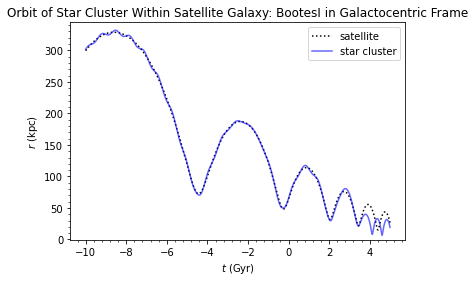

<Figure size 864x720 with 0 Axes>

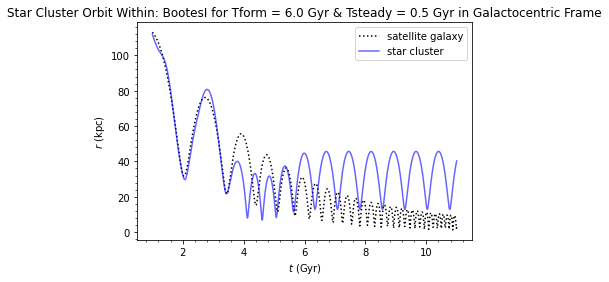

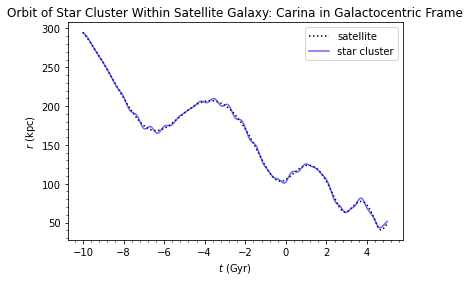

<Figure size 864x720 with 0 Axes>

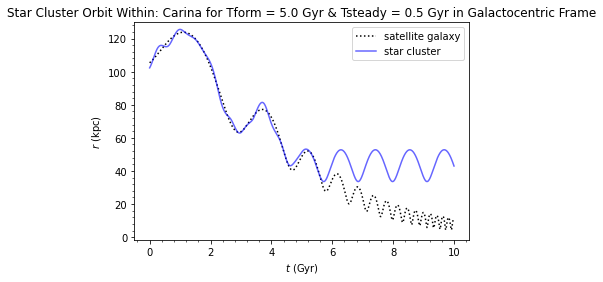

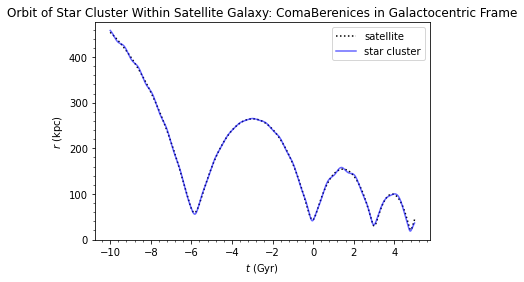

<Figure size 864x720 with 0 Axes>

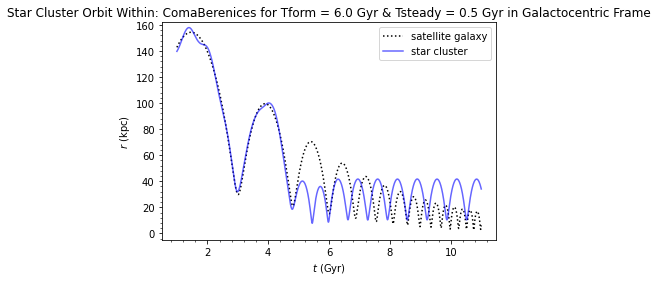

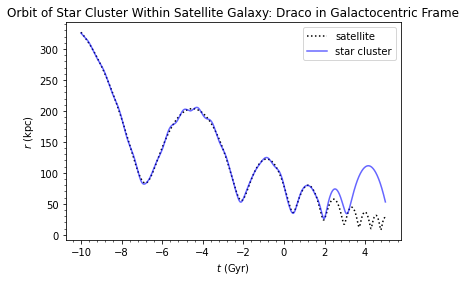

<Figure size 864x720 with 0 Axes>

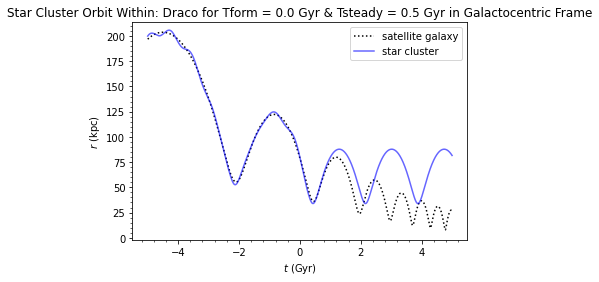

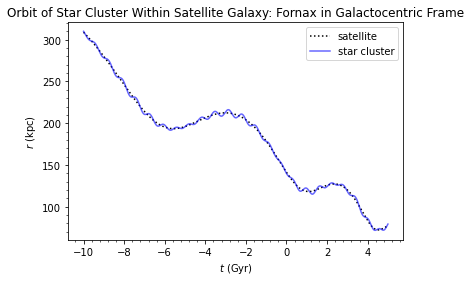

<Figure size 864x720 with 0 Axes>

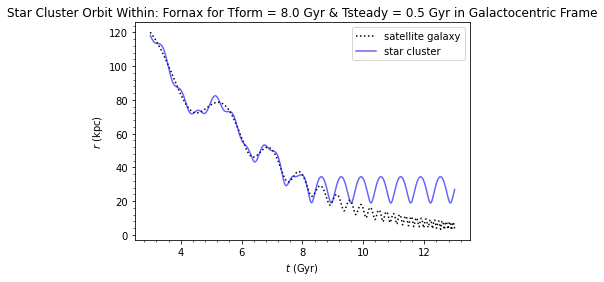

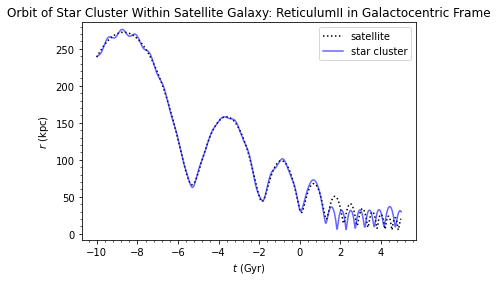

<Figure size 864x720 with 0 Axes>

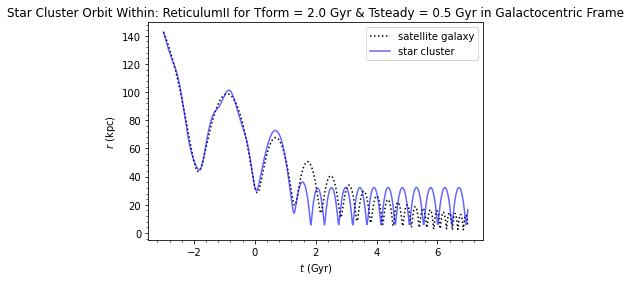

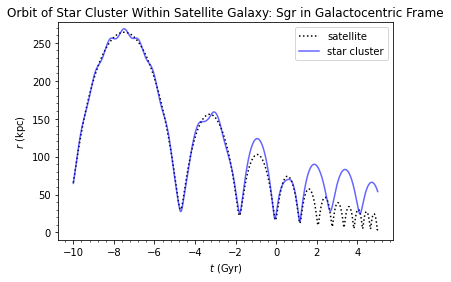

<Figure size 864x720 with 0 Axes>

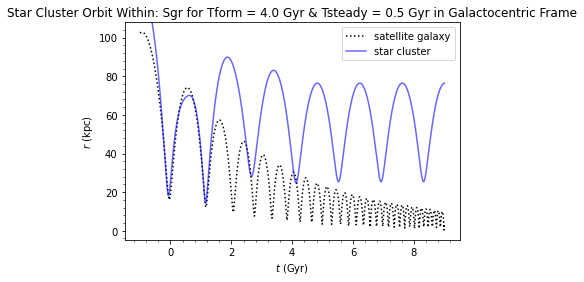

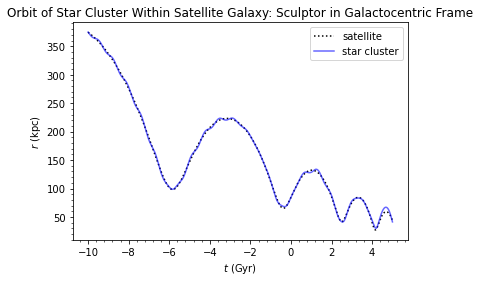

<Figure size 864x720 with 0 Axes>

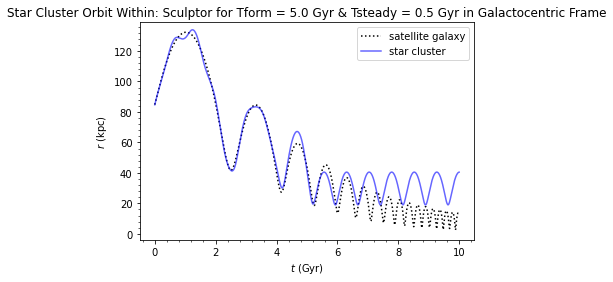

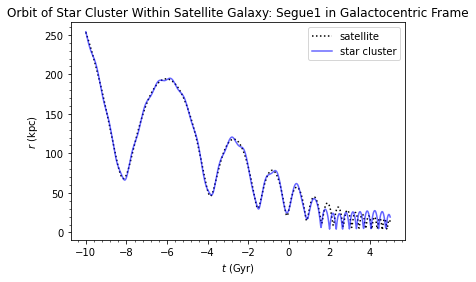

<Figure size 864x720 with 0 Axes>

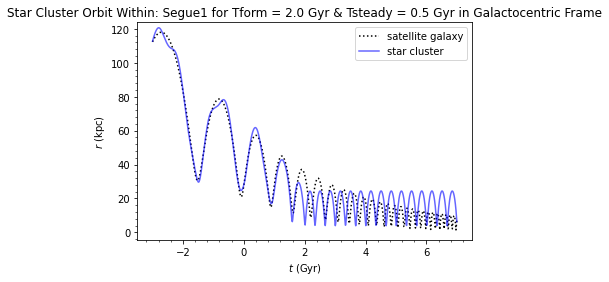

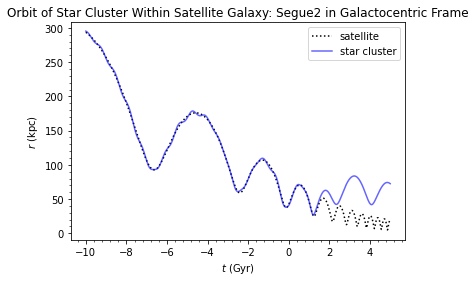

<Figure size 864x720 with 0 Axes>

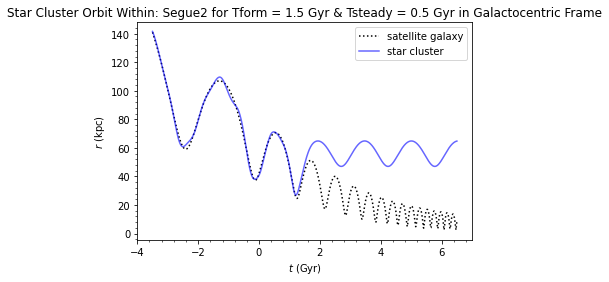

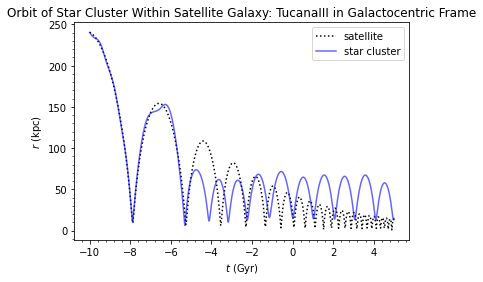

<Figure size 864x720 with 0 Axes>

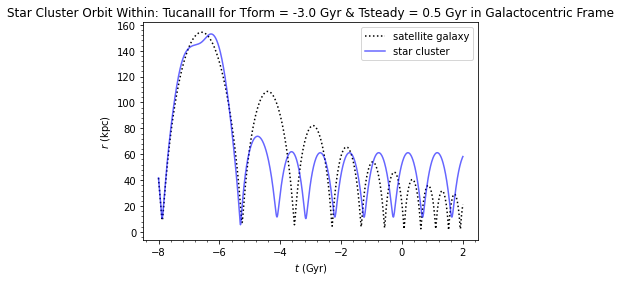

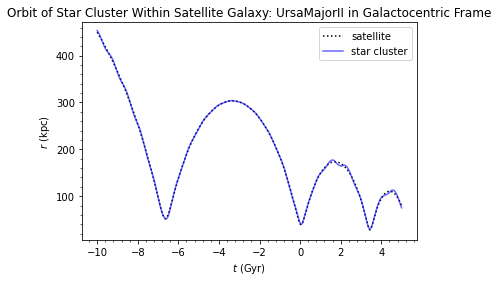

<Figure size 864x720 with 0 Axes>

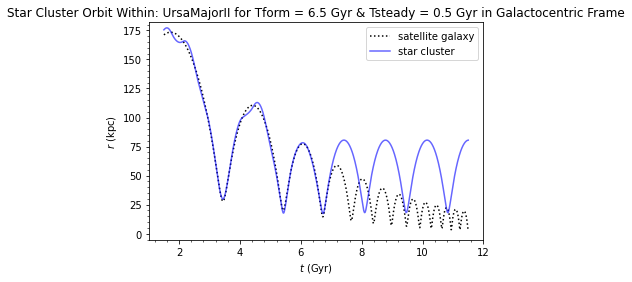

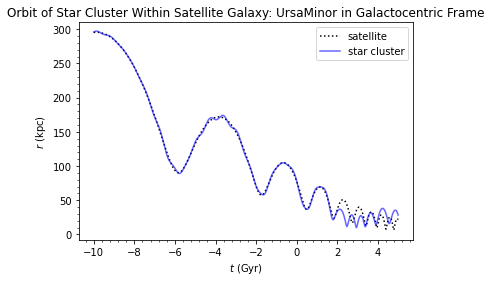

<Figure size 864x720 with 0 Axes>

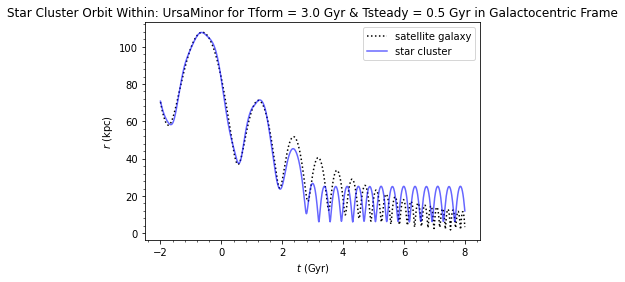

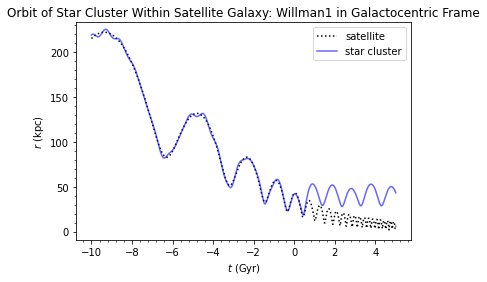

<Figure size 864x720 with 0 Axes>

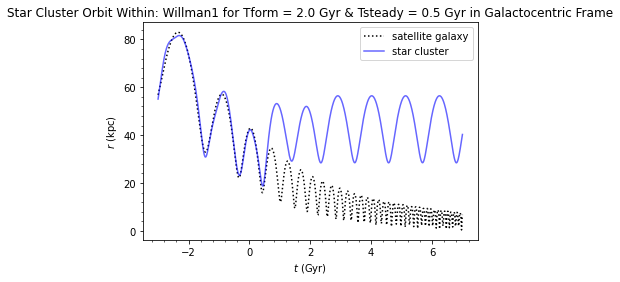

In [5]:
##### Plot cluster orbits for each of the satellite galaxies for a given tform - decide best tform to use for each satellite galaxy
for index in index_list:
    sat = satellite_gal[index]
    sat_name = name_satellite_gal[index]
    tform = tform_dict[sat_name]
    end_pos_cluster, end_pos_gal,dswp, cdf = plot_sat_cluster(sat, sat_name, potential, 't', 'r',Msat, size, x,y,z,vx,vy,vz,
                                                              tform, tsteady)
    

<Figure size 864x720 with 0 Axes>

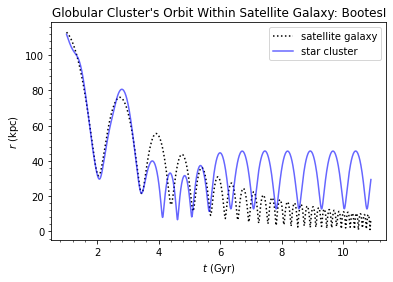

<Figure size 1152x864 with 0 Axes>

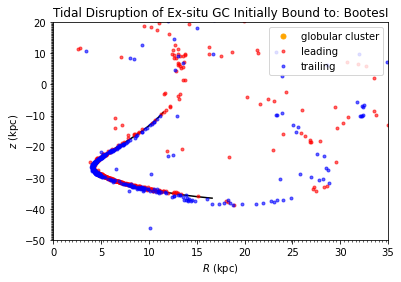

<Figure size 1152x864 with 0 Axes>

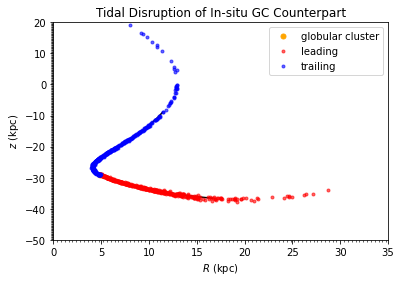

<Figure size 864x720 with 0 Axes>

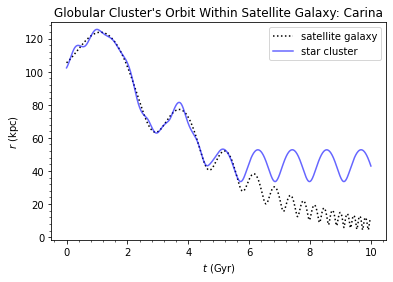

<Figure size 1152x864 with 0 Axes>

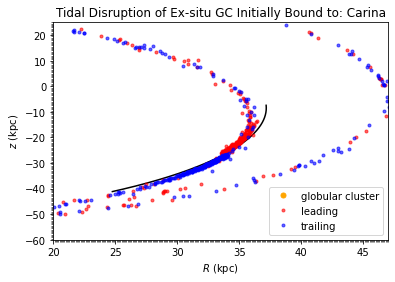

<Figure size 1152x864 with 0 Axes>

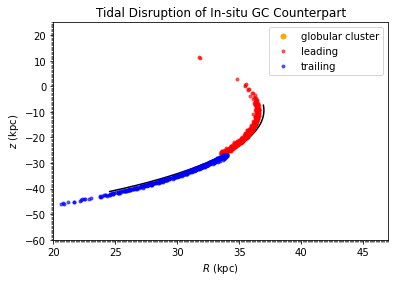

<Figure size 864x720 with 0 Axes>

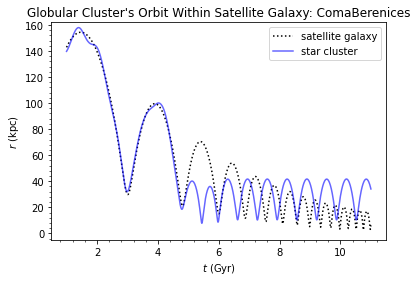

<Figure size 1152x864 with 0 Axes>

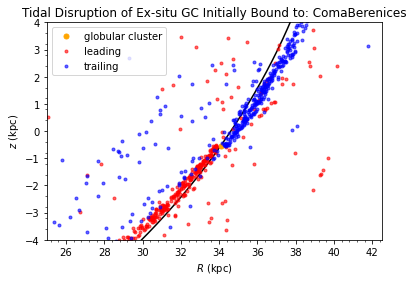

<Figure size 1152x864 with 0 Axes>

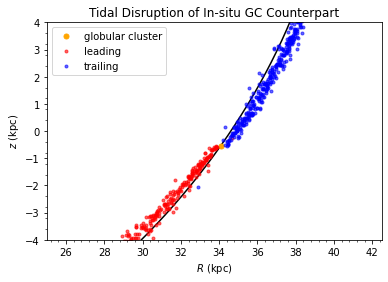

<Figure size 864x720 with 0 Axes>

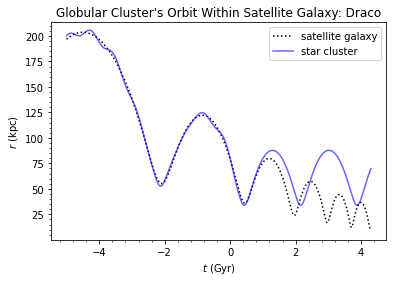

<Figure size 1152x864 with 0 Axes>

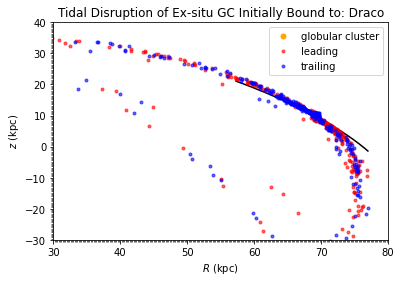

<Figure size 1152x864 with 0 Axes>

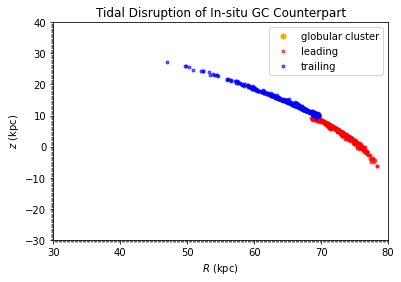

<Figure size 864x720 with 0 Axes>

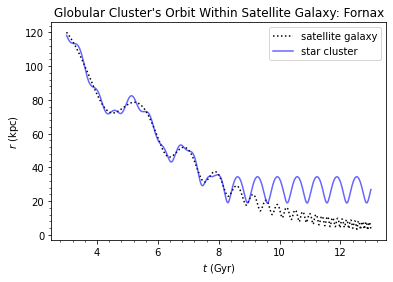

<Figure size 1152x864 with 0 Axes>

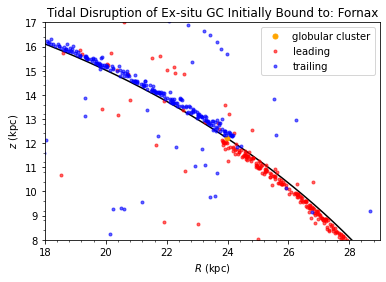

<Figure size 1152x864 with 0 Axes>

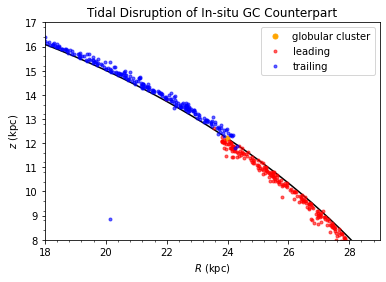

<Figure size 864x720 with 0 Axes>

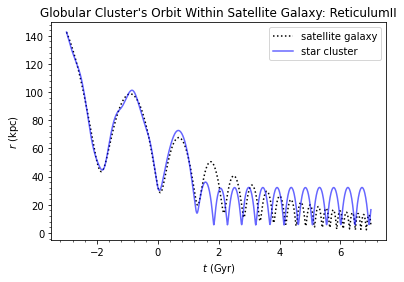

<Figure size 1152x864 with 0 Axes>

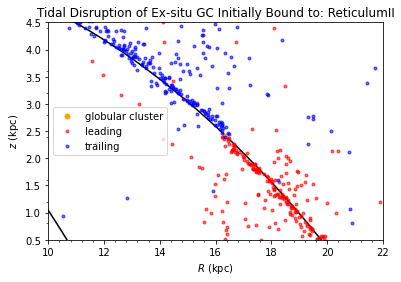

<Figure size 1152x864 with 0 Axes>

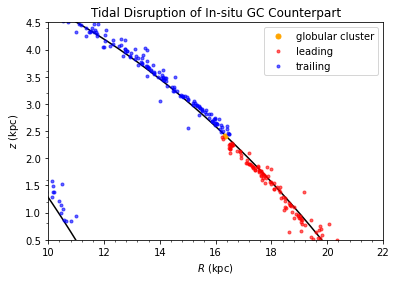

<Figure size 864x720 with 0 Axes>

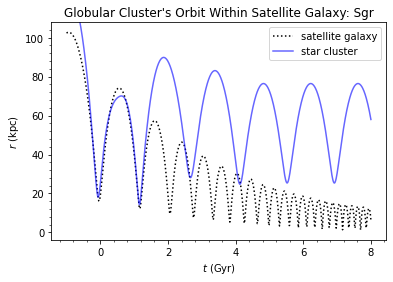

<Figure size 1152x864 with 0 Axes>

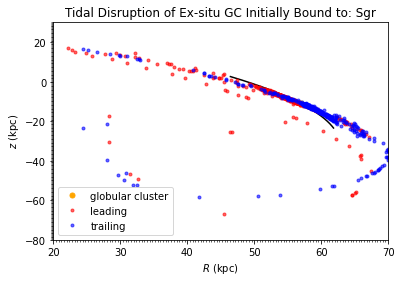

<Figure size 1152x864 with 0 Axes>

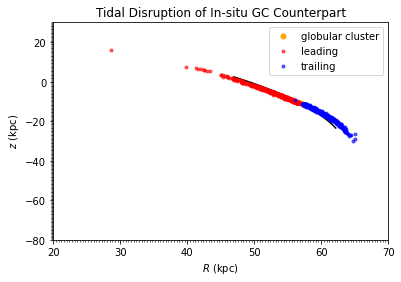

<Figure size 864x720 with 0 Axes>

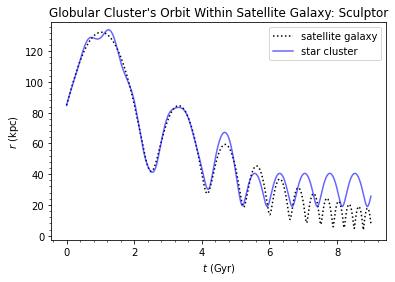

<Figure size 1152x864 with 0 Axes>

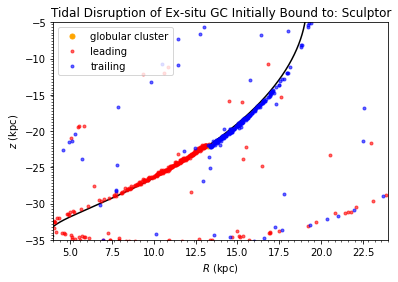

<Figure size 1152x864 with 0 Axes>

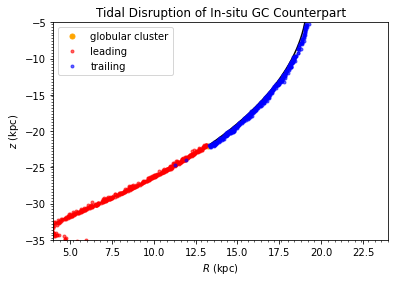

<Figure size 864x720 with 0 Axes>

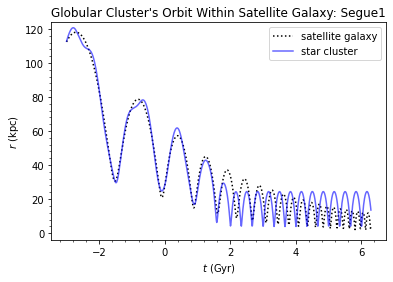

In [ ]:
# MODELLING TIDAL STREAMS

RvR_arr = []
RvRt_arr = []
dt_arr = []
dtt_arr = []
orbitf_arr = []
orbitb_arr = []
tstart_arr = []
tend_arr = []
stream_data = [RvR_arr, RvRt_arr, dt_arr, dtt_arr, orbitf_arr, orbitb_arr, tstart_arr, tend_arr]

# Run function to plot tidalstreams and save plots 
for counter, index in enumerate(index_list):
    sat = satellite_gal[index]
    sat_name = name_satellite_gal[index]
    tform = tform_dict[sat_name]
    ###unboundt = unbound_dict[sat_name]
    post_tform = post_tform_dict[sat_name]
    xlims = xlim_dict[sat_name].split(',')
    xlim = (float(xlims[0]), float(xlims[1]))
    ylims = ylim_dict[sat_name].split(',')
    ylim = (float(ylims[0]), float(ylims[1]))
    
    RvR, RvRt, dt, dtt, cluster_orbit, cluster_orbitb, tstart, tend\
    =plot_tidalstreams(sat, sat_name, potential,xaxis, yaxis, Msat, size, x,y,z,vx,vy,vz,tform,tsteady, Mcluster,\
                       post_tform = post_tform, xlim=xlim, ylim=ylim )

    stream_data[0].append(RvR)
    stream_data[1].append(RvRt)
    stream_data[2].append(dt)
    stream_data[3].append(dtt)
    stream_data[4].append(cluster_orbit)
    stream_data[5].append(cluster_orbitb)
    stream_data[6].append(tstart)
    stream_data[7].append(tend)


In [ ]:
# Zoom into plots of tidal streams - no colormaps yet 
# Run function to plot tidalstreams
for counter, index in enumerate(index_list):
    sat = satellite_gal[index]
    sat_name = name_satellite_gal[index]
    xlims = xlim_dict[sat_name].split(',')
    xlim = (float(xlims[0]), float(xlims[1]))
    ylims = ylim_dict[sat_name].split(',')
    ylim = (float(ylims[0]), float(ylims[1]))
        

    RvR = stream_data[0][counter]
    RvRt = stream_data[1][counter]
    orbit = stream_data[4][counter]
    orbitb = stream_data[5][counter]
    tstart = stream_data[6][counter]
    tend = stream_data[7][counter]
    zoom(orbit, orbitb, tstart, tend, RvR, RvRt, xlim, ylim, sat_name)
    

In [ ]:
# Plot colormaps using xlim and ylim for each satellite
# Run function to plot tidalstreams
for counter, index in enumerate(index_list):
    sat = satellite_gal[index]
    sat_name = name_satellite_gal[index]
    xlims = xlim_dict[sat_name].split(',')
    xlim = (float(xlims[0]), float(xlims[1]))
    ylims = ylim_dict[sat_name].split(',')
    ylim = (float(ylims[0]), float(ylims[1]))

    RvR = stream_data[0][counter]
    RvRt = stream_data[1][counter]
    dt = stream_data[2][counter] 
    dtt = stream_data[3][counter] 
    orbit = stream_data[4][counter]
    orbitb = stream_data[5][counter]
    tstart = stream_data[6][counter]
    tend = stream_data[7][counter]
    
    plot_colormap(orbit, orbitb, tstart, tend, RvR, RvRt, dt, dtt, xlim, ylim, sat_name)
    

In [ ]:
# Run test_cocoon and test_stream to see stars stripped before unbound time and after unbound time 
for counter, index in enumerate(index_list):
    sat = satellite_gal[index]
    sat_name = name_satellite_gal[index]
    tform = tform_dict[sat_name]
    unboundt = unbound_dict[sat_name]
    post_tform = post_tform_dict[sat_name]
    
    xlims = xlim_dict[sat_name].split(',')
    xlim = (float(xlims[0]), float(xlims[1]))
    ylims = ylim_dict[sat_name].split(',')
    ylim = (float(ylims[0]), float(ylims[1]))
    

    RvR = stream_data[0][counter]
    RvRt = stream_data[1][counter]
    dt = stream_data[2][counter]
    dtt = stream_data[3][counter]
    orbit = stream_data[4][counter]
    orbitb = stream_data[5][counter]
    test_cocoon(orbit, orbitb, RvR, RvRt, dt, dtt, xlim, ylim, sat_name,tform, post_tform = post_tform, end_strip=unboundt)
    test_stream(orbit, orbitb, RvR, RvRt, dt, dtt, xlim, ylim, sat_name,tform, post_tform = post_tform, end_strip=unboundt)


In [ ]:
### SATELLITES with somewhat structured cocoons:
# BootesI, Draco, Carina, Sgr, Segue2, UrsaMajorII, Willman1

index_list = [1,5,10,27,30,39]
tform_dict = {'BootesI': 6.*units.Gyr, 'Carina': 5.*units.Gyr, 'Draco': 0.*units.Gyr, 'Sgr': 4.*units.Gyr, 'Segue2': 1.5*units.Gyr, 'Willman1': 2.*units.Gyr}
unbound_dict = {'BootesI': 3.5*units.Gyr, 'Carina': 5.5*units.Gyr, 'Draco': 1.*units.Gyr, 'Sgr': 1.*units.Gyr,  'Segue2': 1.5*units.Gyr, 'Willman1': 0.5*units.Gyr}
xlim_dict = {'BootesI': '0,35', 'Carina': '20,47','Draco': '30,80', 'Sgr': '20,70', 'Segue2': '0,60', 'Willman1': '10,30'}
ylim_dict = {'BootesI': '-50,20', 'Carina': '-60,25', 'Draco': '-30,40','Sgr': '-80,30', 'Segue2': '-50,70','Willman1': '-50,50'}
pre_tform_dict = {'BootesI': 6.*units.Gyr, 'Carina': 5.*units.Gyr,'Draco': 5.*units.Gyr, 'Sgr': 7.*units.Gyr, 'Segue2': 5.*units.Gyr,'Willman1': 5.*units.Gyr}
post_tform_dict = {'BootesI': 4.9*units.Gyr, 'Carina': 5.*units.Gyr, 'Draco': 4.3*units.Gyr, 'Sgr': 4.*units.Gyr, 'Segue2': 5.25*units.Gyr, 'Willman1': 5.*units.Gyr}



RvR_arr = []
RvRt_arr = []
dt_arr = []
dtt_arr = []
orbitf_arr = []
orbitb_arr = []
tstart_arr = []
tend_arr = []
stream_data2 = [RvR_arr, RvRt_arr, dt_arr, dtt_arr, orbitf_arr, orbitb_arr, tstart_arr, tend_arr]

# Run function to plot tidalstreams and save plots 
for counter, index in enumerate(index_list):
    sat = satellite_gal[index]
    sat_name = name_satellite_gal[index]
    tform = tform_dict[sat_name]
    unboundt = unbound_dict[sat_name]
    post_tform = post_tform_dict[sat_name]
    pre_tform = pre_tform_dict[sat_name]
    
    xlims = xlim_dict[sat_name].split(',')
    xlim = (float(xlims[0]), float(xlims[1]))
    ylims = ylim_dict[sat_name].split(',')
    ylim = (float(ylims[0]), float(ylims[1]))
    
    RvR, RvRt, dt, dtt, cluster_orbit, cluster_orbitb, tstart, tend\
    =plot_tidalstreams(sat, sat_name, potential,xaxis, yaxis, Msat, size, x,y,z,vx,vy,vz,tform,tsteady, Mcluster,\
                       pre_tform= pre_tform, post_tform = post_tform, unbound_time = unboundt,xlim=xlim, ylim=ylim )

    stream_data2[0].append(RvR)
    stream_data2[1].append(RvRt)
    stream_data2[2].append(dt)
    stream_data2[3].append(dtt)
    stream_data2[4].append(cluster_orbit)
    stream_data2[5].append(cluster_orbitb)
    stream_data2[6].append(tstart)
    stream_data2[7].append(tend)
    
# Run test_cocoon and test_stream to see stars stripped before unbound time and after unbound time 
for counter, index in enumerate(index_list):
    sat = satellite_gal[index]
    sat_name = name_satellite_gal[index]
    tform = tform_dict[sat_name]
    unboundt = unbound_dict[sat_name]
    post_tform = post_tform_dict[sat_name]
    pre_tform = pre_tform_dict[sat_name]
    
    xlims = xlim_dict[sat_name].split(',')
    xlim = (float(xlims[0]), float(xlims[1]))
    ylims = ylim_dict[sat_name].split(',')
    ylim = (float(ylims[0]), float(ylims[1]))
    

    RvR = stream_data2[0][counter]
    RvRt = stream_data2[1][counter]
    dt = stream_data2[2][counter]
    dtt = stream_data2[3][counter]
    orbit = stream_data2[4][counter]
    orbitb = stream_data2[5][counter]
    test_cocoon(orbit, orbitb, RvR, RvRt, dt, dtt, xlim, ylim, sat_name,tform, pre_tform = pre_tform, post_tform = post_tform, end_strip=unboundt)
    test_stream(orbit, orbitb, RvR, RvRt, dt, dtt, xlim, ylim, sat_name,tform,pre_tform = pre_tform,  post_tform = post_tform, end_strip=unboundt)

